<a href="https://colab.research.google.com/github/vedants556/Collabs/blob/main/MV_lab/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#9. Study and Implement various Image Edge Detection Techniques.

Vedant Shelar

22102A0027

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files


Load and Display an Image

Saving maxresdefault.jpg to maxresdefault.jpg


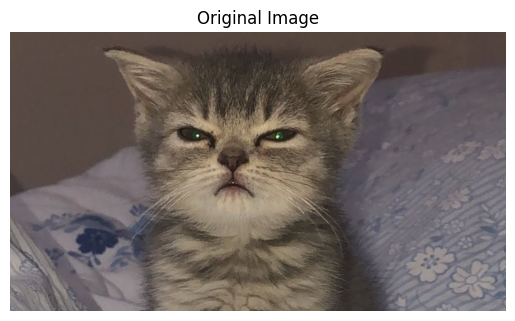

In [26]:
# Upload an image
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()


3.1 Sobel Filter


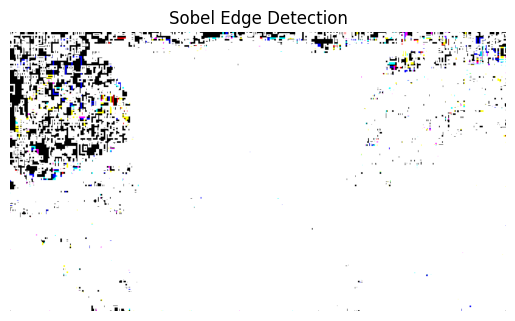

In [27]:
# Sobel Filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display Sobel result
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')
plt.title('Sobel Edge Detection')
plt.show()


3.2 Prewitt Filter


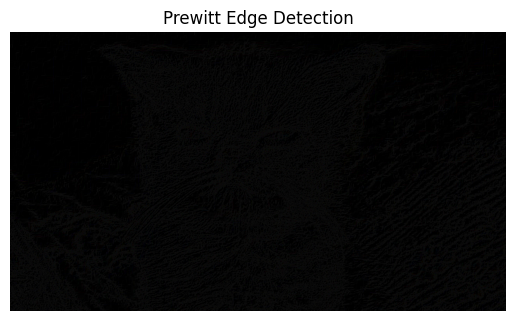

In [28]:
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_edge_x = cv2.filter2D(image, -1, prewitt_x)
prewitt_edge_y = cv2.filter2D(image, -1, prewitt_y)
prewitt_magnitude = np.sqrt(prewitt_edge_x**2 + prewitt_edge_y**2)

# Normalize Prewitt result to uint8
prewitt_magnitude = np.clip(prewitt_magnitude, 0, 255).astype(np.uint8)

# Display Prewitt result
plt.imshow(prewitt_magnitude, cmap='gray')
plt.axis('off')
plt.title('Prewitt Edge Detection')
plt.show()


3.3 Roberts Filter


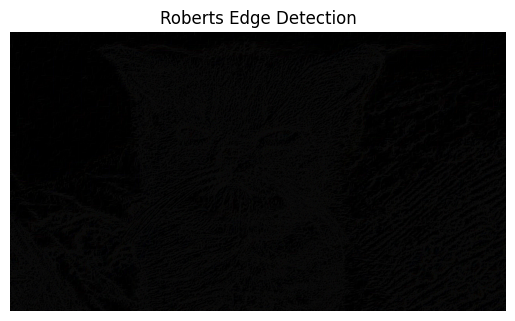

In [29]:
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

roberts_edge_x = cv2.filter2D(image, -1, roberts_x)
roberts_edge_y = cv2.filter2D(image, -1, roberts_y)
roberts_magnitude = np.sqrt(roberts_edge_x**2 + roberts_edge_y**2)

# Normalize Roberts result to uint8
roberts_magnitude = np.clip(roberts_magnitude, 0, 255).astype(np.uint8)


# Display Prewitt result
plt.imshow(prewitt_magnitude)
plt.axis('off')
plt.title('Roberts Edge Detection')
plt.show()

3.4 Laplacian Filter


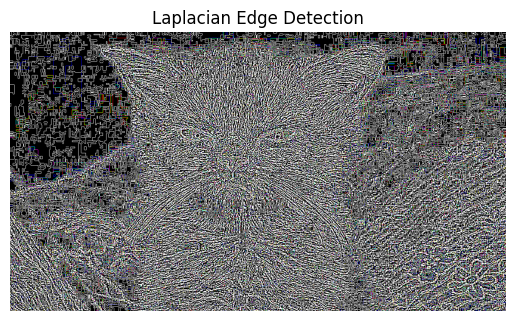

In [30]:
# Laplacian Filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display Laplacian result
plt.imshow(laplacian, cmap='gray')
plt.axis('off')
plt.title('Laplacian Edge Detection')
plt.show()


3.5 Laplacian of Gaussian (LoG) Filter


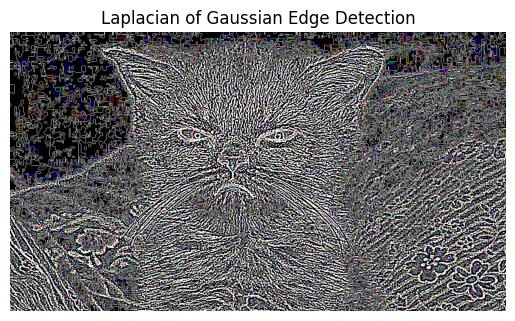

In [31]:
# Laplacian of Gaussian (LoG) Filter
gaussian = cv2.GaussianBlur(image, (5, 5), 0)
log = cv2.Laplacian(gaussian, cv2.CV_64F)

# Display LoG result
plt.imshow(log, cmap='gray')
plt.axis('off')
plt.title('Laplacian of Gaussian Edge Detection')
plt.show()


3.6 Canny Edge Detector


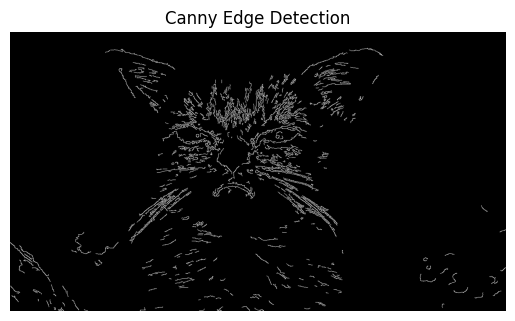

In [32]:
# Canny Edge Detector
canny_edges = cv2.Canny(image, 100, 200)

# Display Canny result
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edge Detection')
plt.show()


#10. Study and Implement various Image Segmentation Techniques.

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, segmentation, color
from sklearn.cluster import KMeans
from skimage import measure
from skimage import io


Convert to Grayscale

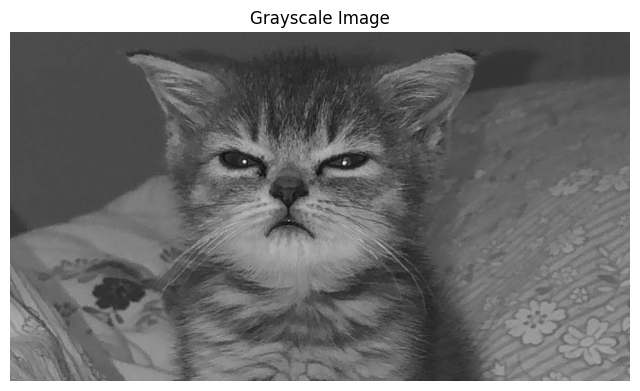

In [34]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


Otsu’s Thresholding

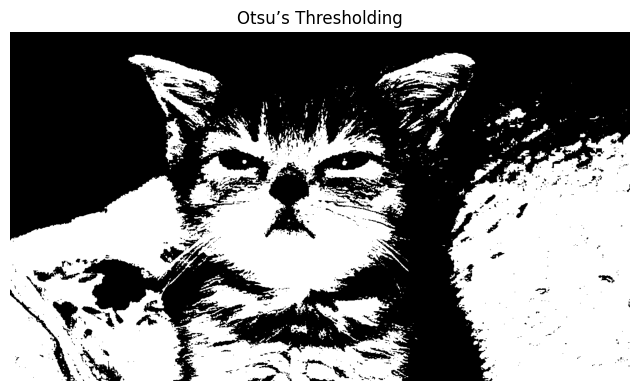

In [35]:
# Otsu's Thresholding
thresh_value, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(8, 8))
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Otsu’s Thresholding')
plt.axis('off')
plt.show()


Edge Detection using Sobel Operator

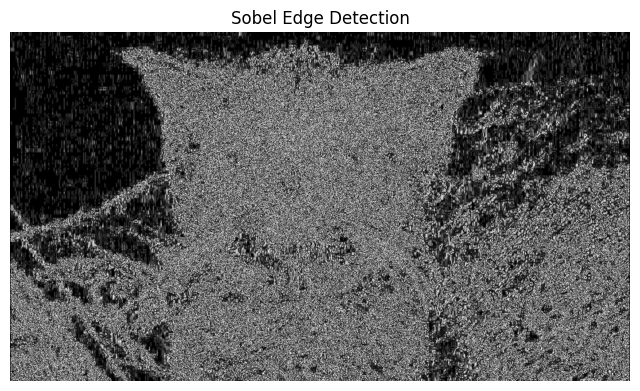

In [36]:
# Sobel Edge Detection
sobel_edges = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)  # x direction
sobel_edges = np.uint8(np.absolute(sobel_edges))

plt.figure(figsize=(8, 8))
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


Region Growing

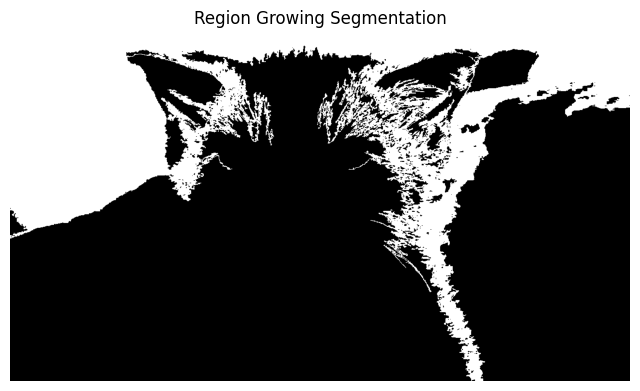

In [37]:
# Region Growing Example
def region_growing(img, seed, threshold):
    h, w = img.shape
    visited = np.zeros_like(img, dtype=bool)
    region = []

    def neighbors(x, y):
        return [(x + dx, y + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1]
                if (0 <= x + dx < h) and (0 <= y + dy < w)]

    def grow_region(seed):
        region.append(seed)
        visited[seed] = True
        pixel_intensity = img[seed]

        while region:
            x, y = region.pop(0)
            for nx, ny in neighbors(x, y):
                if not visited[nx, ny] and abs(int(img[nx, ny]) - int(pixel_intensity)) < threshold:
                    region.append((nx, ny))
                    visited[nx, ny] = True

    grow_region(seed)
    return visited

seed_point = (100, 100)  # Replace with your seed point
threshold_value = 15
segmented_image = region_growing(gray_image, seed_point, threshold_value)

plt.figure(figsize=(8, 8))
plt.imshow(segmented_image, cmap='gray')
plt.title('Region Growing Segmentation')
plt.axis('off')
plt.show()


K-means Clustering

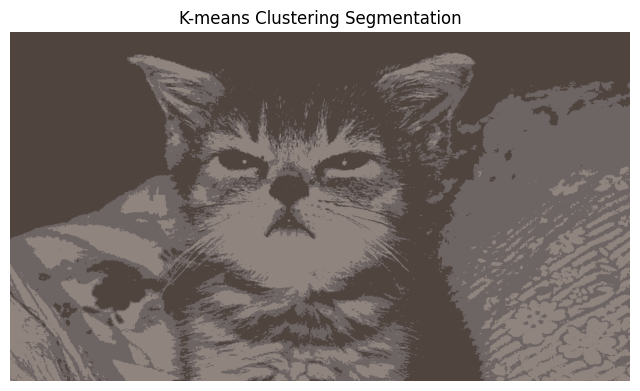

In [38]:
# K-means Clustering
def kmeans_segmentation(image, k):
    # Reshape image to a 2D array of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply KMeans
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixel_values)

    # Replace each pixel value with its corresponding cluster center
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape).astype('uint8')

    return segmented_image

k = 3  # Number of clusters
kmeans_segmented = kmeans_segmentation(image, k)

plt.figure(figsize=(8, 8))
plt.imshow(kmeans_segmented)
plt.title('K-means Clustering Segmentation')
plt.axis('off')
plt.show()


Watershed Segmentation

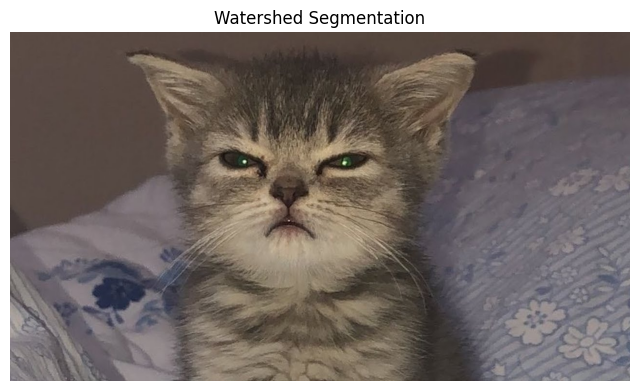

In [42]:
# Watershed Segmentation
def watershed_segmentation(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply a Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Perform Otsu's thresholding
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Distance transform
    distance = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(distance, 0.7 * distance.max(), 255, 0)

    # Ensure the types match before subtraction
    sure_fg = sure_fg.astype(np.uint8)
    unknown = cv2.subtract(thresh, sure_fg)

    # Marker labeling
    _, markers = cv2.connectedComponents(np.uint8(sure_fg))

    markers = markers + 1
    markers[unknown == 255] = 0

    # Watershed algorithm
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Mark the borders

    return image

    watershed_segmented = watershed_segmentation(image)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()


#11. Study and Implement Object Detection Technique.